In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Forgetters
from Forgetters.GradientBoostingForgetters import GBClassifierForgetter, GBRegressorForgetter
from Forgetters.AdaptiveBoostingForgetters import ABClassifierForgetter, ABRegressorForgetter

# Compression strategies
from CompressionStrategies.DropUnforgettable import DropUnforgettableClassification
from CompressionStrategies.DropNForgets import DropNForgetsClassification

# sklearn stuff
from sklearn.metrics import accuracy_score, classification_report

# Other utils
from utils import predictions_to_y, get_accuracy_score
from DatasetLoader import DatasetLoader



In [8]:
import copy

def plot_compressed_length_by_n_estimators(X, y, lr=1, step=50, max=500):
    X = X.to_numpy()


    kept_ratio = []
    
    x = range(1,max,step)
    
    compression_strategy = DropNForgetsClassification(n=2)
    base_model = DecisionTreeClassifier(max_depth=2)
        
        
    for n in x:

        
        forg = ABClassifierForgetter(estimator=base_model, learning_rate=lr, n_estimators=n)

        forg.fit(X, y)

        
        _, y_compressed = forg.transform(X, compression_strategy, y=y)
        
        kept_ratio.append(len(y_compressed)/len(y))
        
        
    

    plt.plot(x, kept_ratio, label="ABClassifierForgetter")
    plt.legend()
    plt.xlabel("n_estimators")
    plt.ylabel("Ratio de points conservés")
    plt.title("Ratio de points conservés selon n_estimators")
    plt.grid()
    plt.show()  

def plot_dataset_convergence(X, y):
    plot_compressed_length_by_n_estimators(X, y)

40981


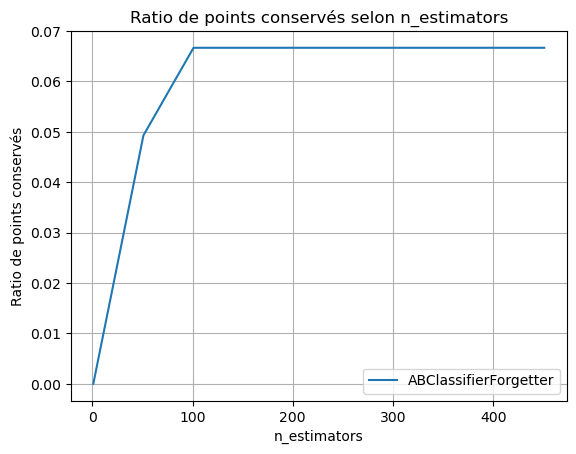

37


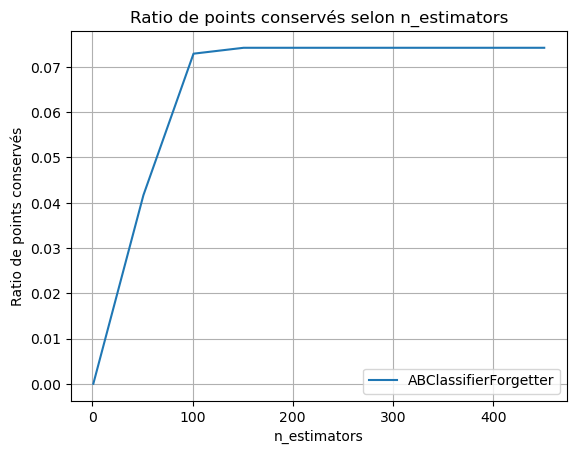

50
333
334
335
1063


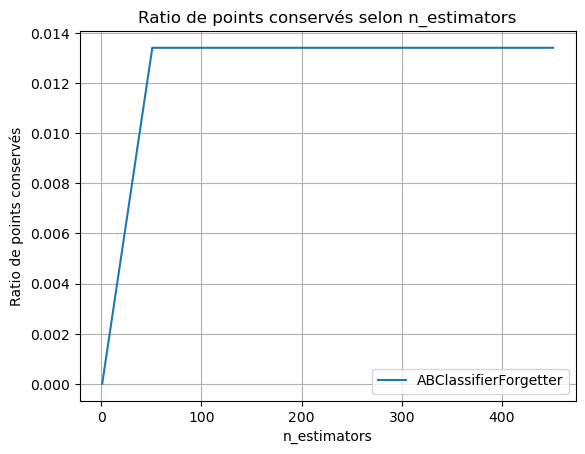

1464


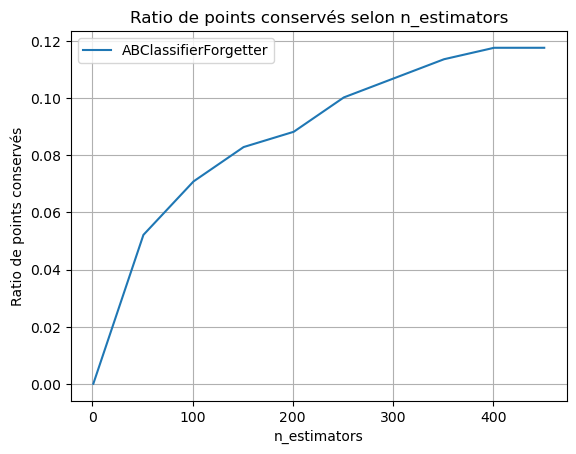

1467


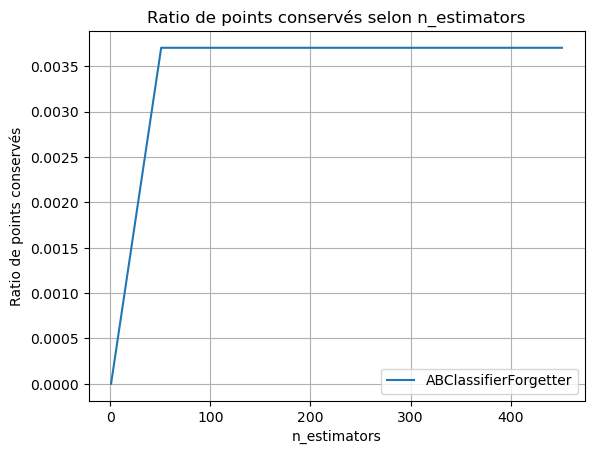

1480


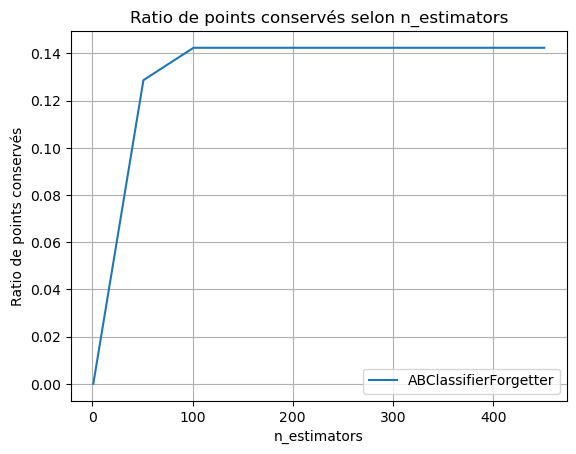

1510


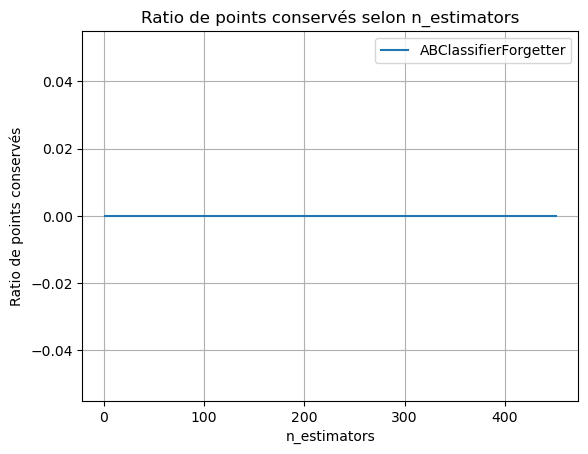

In [10]:
import openml
from sklearn.preprocessing import LabelEncoder


# List datasets with specific criteria (e.g., classification with >2 classes)
datasets = openml.datasets.list_datasets(tag='OpenML100')
filtered_datasets = [
    ds for ds in datasets.values()
    if ds['NumberOfClasses'] == 2 and ds['NumberOfInstances'] < 1000 and  ds['NumberOfInstancesWithMissingValues'] == 0
]

# Display filtered dataset information
df = pd.DataFrame(filtered_datasets)

for dataset_id in df.iloc[:]['did']:
    print(dataset_id)
    dataset = openml.datasets.get_dataset(int(dataset_id))
    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
    
    X = X.select_dtypes(include=['number'])
    if len(X.columns) > 0:
    
        # Convert y to integers
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
        y = pd.DataFrame(y.ravel())
            
        plot_dataset_convergence(X, y)

